- Perform Topic modeling on a social media corpus like Twitter or Reddit by using any python library. The topic modeling must be done using LDA and doc2vec models. Also, a performance comparison has to be performed based on the two methods.



- libraries

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
nltk.download('tagsets')
nltk.download("stopwords")

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Data

In [ ]:
from nltk.corpus import twitter_samples
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [ ]:
text = twitter_samples.strings('tweets.20150430-223406.json')
len(text)

20000

In [ ]:
text[:3]

['RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
 'VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY',
 'RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…']

- Pre processing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [ ]:
import pandas as pd
df=pd.DataFrame(text)
df.columns=["data"]
df.index+=1

In [ ]:
df

,data
1,RT @KirkKus: Indirect cost of the UK being in ...
2,VIDEO: Sturgeon on post-election deals http://...
3,RT @LabourEoin: The economy was growing 3 time...
4,RT @GregLauder: the UKIP east lothian candidat...
5,RT @thesundaypeople: UKIP's housing spokesman ...
...,...
19996,RT @UKLabour: .@Ed_Miliband: we're not going t...
19997,RT @DisabledScot: @blairmcdougall @ScotlandTon...
19998,RT @Staircase2: @VividRicky exactly but that a...
19999,Actually agreed with %95 of what farage was sa...


In [ ]:
#df["data"]=df["data"].str.replace("[^a-zA-Z#]", " ")

In [ ]:
import re
# Code to remove the Hashtags from the text
df["data"]=df["data"].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
df["data"]=df["data"].apply(lambda x:re.sub(r"http\S+", "", x))
df["data"]=df["data"].apply(lambda x:re.sub(r"RT", "", x))
df["data"]=df["data"].apply(lambda x:re.sub(r"VIDEO", "", x))
df["data"]=df["data"].apply(lambda x:re.sub(r"8\w+", "", x))
df["data"]=df["data"].apply(lambda x:re.sub(r"4\w+", "", x))
df["data"]=df["data"].apply(lambda x:re.sub(r"9\w+", "", x))
# Code to substitute the multiple spaces with single spaces
#df["data"]=df["data"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["data"]=df["data"].apply(lambda x:' '.join(re.findall(r'\w+', x)))

In [ ]:
df

,data
1,KirkKus Indirect cost of the UK being in the E...
2,Sturgeon on post election deals
3,LabourEoin The economy was growing 3 times fas...
4,GregLauder the UKIP east lothian candidate loo...
5,thesundaypeople UKIP s housing spokesman rakes...
...,...
19996,UKLabour Ed_Miliband we re not going to do a d...
19997,DisabledScot blairmcdougall ScotlandTonight bb...
19998,Staircase2 VividRicky exactly but that alleged...
19999,Actually agreed with of what farage was sayin ...


In [ ]:
from nltk.tokenize import word_tokenize
df["data"]=df["data"].apply(lambda x:word_tokenize(x))

In [ ]:
from nltk.corpus import stopwords
stopword=set(stopwords.words("english"))
df["data"]=df["data"].apply(lambda x: [item for item in x if item not in stopword])

In [ ]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
df["data"] = df["data"].apply(lambda x:[w for w in x if w in lemmatizer.lemmatize(w)])
# Remove characters which have length less than 2  
df["data"] = df["data"].apply(lambda x:[word for word in x if len(word) > 2])
# Remove numbers
df["data"] = df["data"].apply(lambda x:[word for word in x if not word.isnumeric()])

In [ ]:
df

,data
1,"[KirkKus, Indirect, cost, estimated, costing, ..."
2,"[Sturgeon, post, election]"
3,"[LabourEoin, The, economy, growing, faster, da..."
4,"[GregLauder, UKIP, east, lothian, candidate, s..."
5,"[thesundaypeople, UKIP, housing, spokesman, ho..."
...,...
19996,"[UKLabour, Ed_Miliband, going, deal, SNP, coal..."
19997,"[DisabledScot, blairmcdougall, ScotlandTonight..."
19998,"[Staircase2, VividRicky, exactly, alleged, com..."
19999,"[Actually, agreed, farage, sayin, rhen, voteukip]"


- LDA model

In [ ]:
from gensim.models import Phrases
tokens = df['data'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
import gensim
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec
#df["data"]=df["data"].apply(lambda x:word_tokenize(x))
dictionary = corpora.Dictionary(tokens)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokens]
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
num_topics=10
ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = 
dictionary, passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary.keys()))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


- visualization

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 7.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 37.7MB/s 
     |████████████████████████████████| 15.3MB 284kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=20212e20b4882a1c63a6c4911e1f5b9979532926b7804c6b7577b91542b6c981
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.215852 -0.066700       1        1  18.687068
6     -0.183280  0.025562       2        1  12.344936
2      0.060856 -0.135034       3        1  11.510742
7     -0.116956 -0.006383       4        1  10.321263
9      0.068456  0.426144       5        1   9.119611
1     -0.097913 -0.052302       6        1   8.696947
5     -0.137588 -0.017669       7        1   8.255231
8      0.145907 -0.071081       8        1   8.210441
0      0.270571 -0.115677       9        1   7.099435
3      0.205799  0.013141      10        1   5.754326, topic_info=              Term         Freq        Total Category  logprob  loglift
15            UKIP  2331.000000  2331.000000  Default  30.0000  30.0000
68             SNP  3543.000000  3543.000000  Default  29.0000  29.0000
222   Nigel_Farage  1222.000000  1222.000000  Default  28.0000  28.0000
312         Farage  1085.000000  1085.000000  Default  27.0000  27.0000
40        Miliband  3780.000000  3780.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
2378          Only    56.292752    61.985267  Topic10  -4.7357   2.7589
1770           htt    72.764024    99.099765  Topic10  -4.4790   2.5463
64          people   207.521801   670.629390  Topic10  -3.4310   1.6822
0          Britain    68.769236   104.815305  Topic10  -4.5355   2.4338
40        Miliband   107.427692  3780.160661  Topic10  -4.0894  -0.7055

[490 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
459       1  0.302324                        And
459       3  0.406974                        And
459       4  0.290696                        And
400       1  1.004146           Apr_LAB_CON_UKIP
24        3  0.155786                        BBC
...     ...       ...                        ...
2062      4  0.999449    would_rather_let_Tories
38        7  0.996794  writer_Jonathan_Ford_next
1369      3  1.001774                      wrong
1430      9  0.999665                      wrote
322       3  0.999457                        yet

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 3, 8, 10, 2, 6, 9, 1, 4])

- On the left side, the area of each circle represents the importance of the topic relative to the corpus. 
- The distance between the center of the circles indicates the similarity between the topics. 
- On the right side, the histogram of each topic shows the top 30 relevant words.

- coherence score for lda model

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokens, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5118355257270835


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

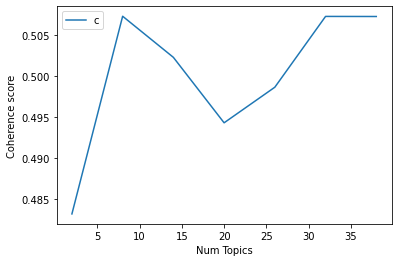

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=Lda(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokens, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

- The above plot shows that coherence score increases with the number of topics, with a decline at 15.Now, choosing the number of topics still depends on your requirement because topic around 33 have good coherence scores but may have repeated keywords in the topic. Topic coherence gives you a good picture so that you can take better decision.

In [ ]:
ldamodel[doc_term_matrix[0]]

[(3, 0.14764439), (7, 0.7336742), (9, 0.110989004)]

In [ ]:
ldamodel[doc_term_matrix[1]]

[(9, 0.9181818)]

In [ ]:
ldamodel[doc_term_matrix[2]]

[(9, 0.97804874)]

In [ ]:
ldamodel[doc_term_matrix[3]]

[(7, 0.86547303), (9, 0.12465038)]

Doc2Vec model

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
a=df["data"].tolist()
# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(a)]

In [ ]:
model = Doc2Vec(tagged_data, vector_size=10, window=2, min_count=1, workers=4, epochs = 100)

In [ ]:
test_doc = word_tokenize("That is a good device".lower())
model.docvecs.most_similar(positive=[model.infer_vector(test_doc)],topn=5)

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[(17455, 0.9139192700386047),
 (9, 0.9121143221855164),
 (19979, 0.9103894829750061),
 (6424, 0.9012660384178162),
 (967, 0.8947340846061707)]

- Conclusion:

Lda model is the best where we can limit the number of topics using coherence score